## INTRODUCTION
(Dataset Source - Kaggle)

#### About the Dataset
The Breast Cancer (Wisconsin) Diagnosis dataset contains a set of 30 features which describe the characteristics of cell nuclei that are computed from digitized images of a fine needle aspirate (FNA) of a breast mass. 

We will analyze the features to understand the predictive values for diagnosis


We will carry out the following three steps:

A. Data Analysis

B. Feature Engineering

C. Model Building and Testing

## A. Data Analysis

In [ ]:
#Necessary Imports for exploratory data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#Read the data
data_original = pd.read_csv('data.csv')

In [ ]:
#Get an idea of the data
data_original.head()

In [4]:
#Shape of the data
data_original.shape

(569, 33)

In [5]:
dataset = data_original.copy()  #create a copy to preserve original data

In [6]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

We will include the following:
1. Missing Values 
2. Categorical features
3. Numerical features
4. Outliers
5. Relationship between independent and dependent features

### 1. Missing Values

In [7]:
na_features = [feature for feature in dataset.columns if dataset[feature].isnull().sum()>0]

for feature in na_features :
    print(feature,': ',np.round(dataset[feature].isnull().mean(),4), '% missing values')

Unnamed: 32 :  1.0 % missing values


In [8]:
#Unnamed: 32 feature contains an empty column so we drop it
#id is also of not any use to us so we also drop it
dataset = dataset.drop('Unnamed: 32',axis = 1).drop('id',axis = 1)


### 2. Categorical Features

In [9]:
categorical_features = [feature for feature in dataset.columns if dataset[feature].dtypes == 'O']

In [10]:
len(categorical_features)

1

In [11]:
dataset[categorical_features].head()

diagnosis
0         M
1         M
2         M
3         M
4         M

In [182]:
print('Malignant cases: ',((dataset['diagnosis'] == 'M')*1).sum())
print('Benign cases: ',((dataset['diagnosis'] == 'B')*1).sum())

Malignant cases:  212
Benign cases:  357


#### The dataset is balanced, so accuracy is a dependable metric

### 3. Numerical Features

In [12]:
num_features = [feature for feature in dataset.columns if dataset[feature].dtypes != 'O']

In [13]:
len(num_features)

30

In [14]:
dataset[num_features].head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

### Numerical features are of two types:

### a. Discrete Feature

In [15]:
discrete_features = [feature for feature in num_features if len(dataset[feature].unique())<25 ]
discrete_features

[]

There are no discrete features

### b. Continuous Features

In [16]:
continuous_features  = [feature for feature in num_features if feature not in discrete_features]
continuous_features

['radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst']

In [17]:
len(continuous_features)

30

All features are continuous

In [18]:
dataset[continuous_features].head()

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

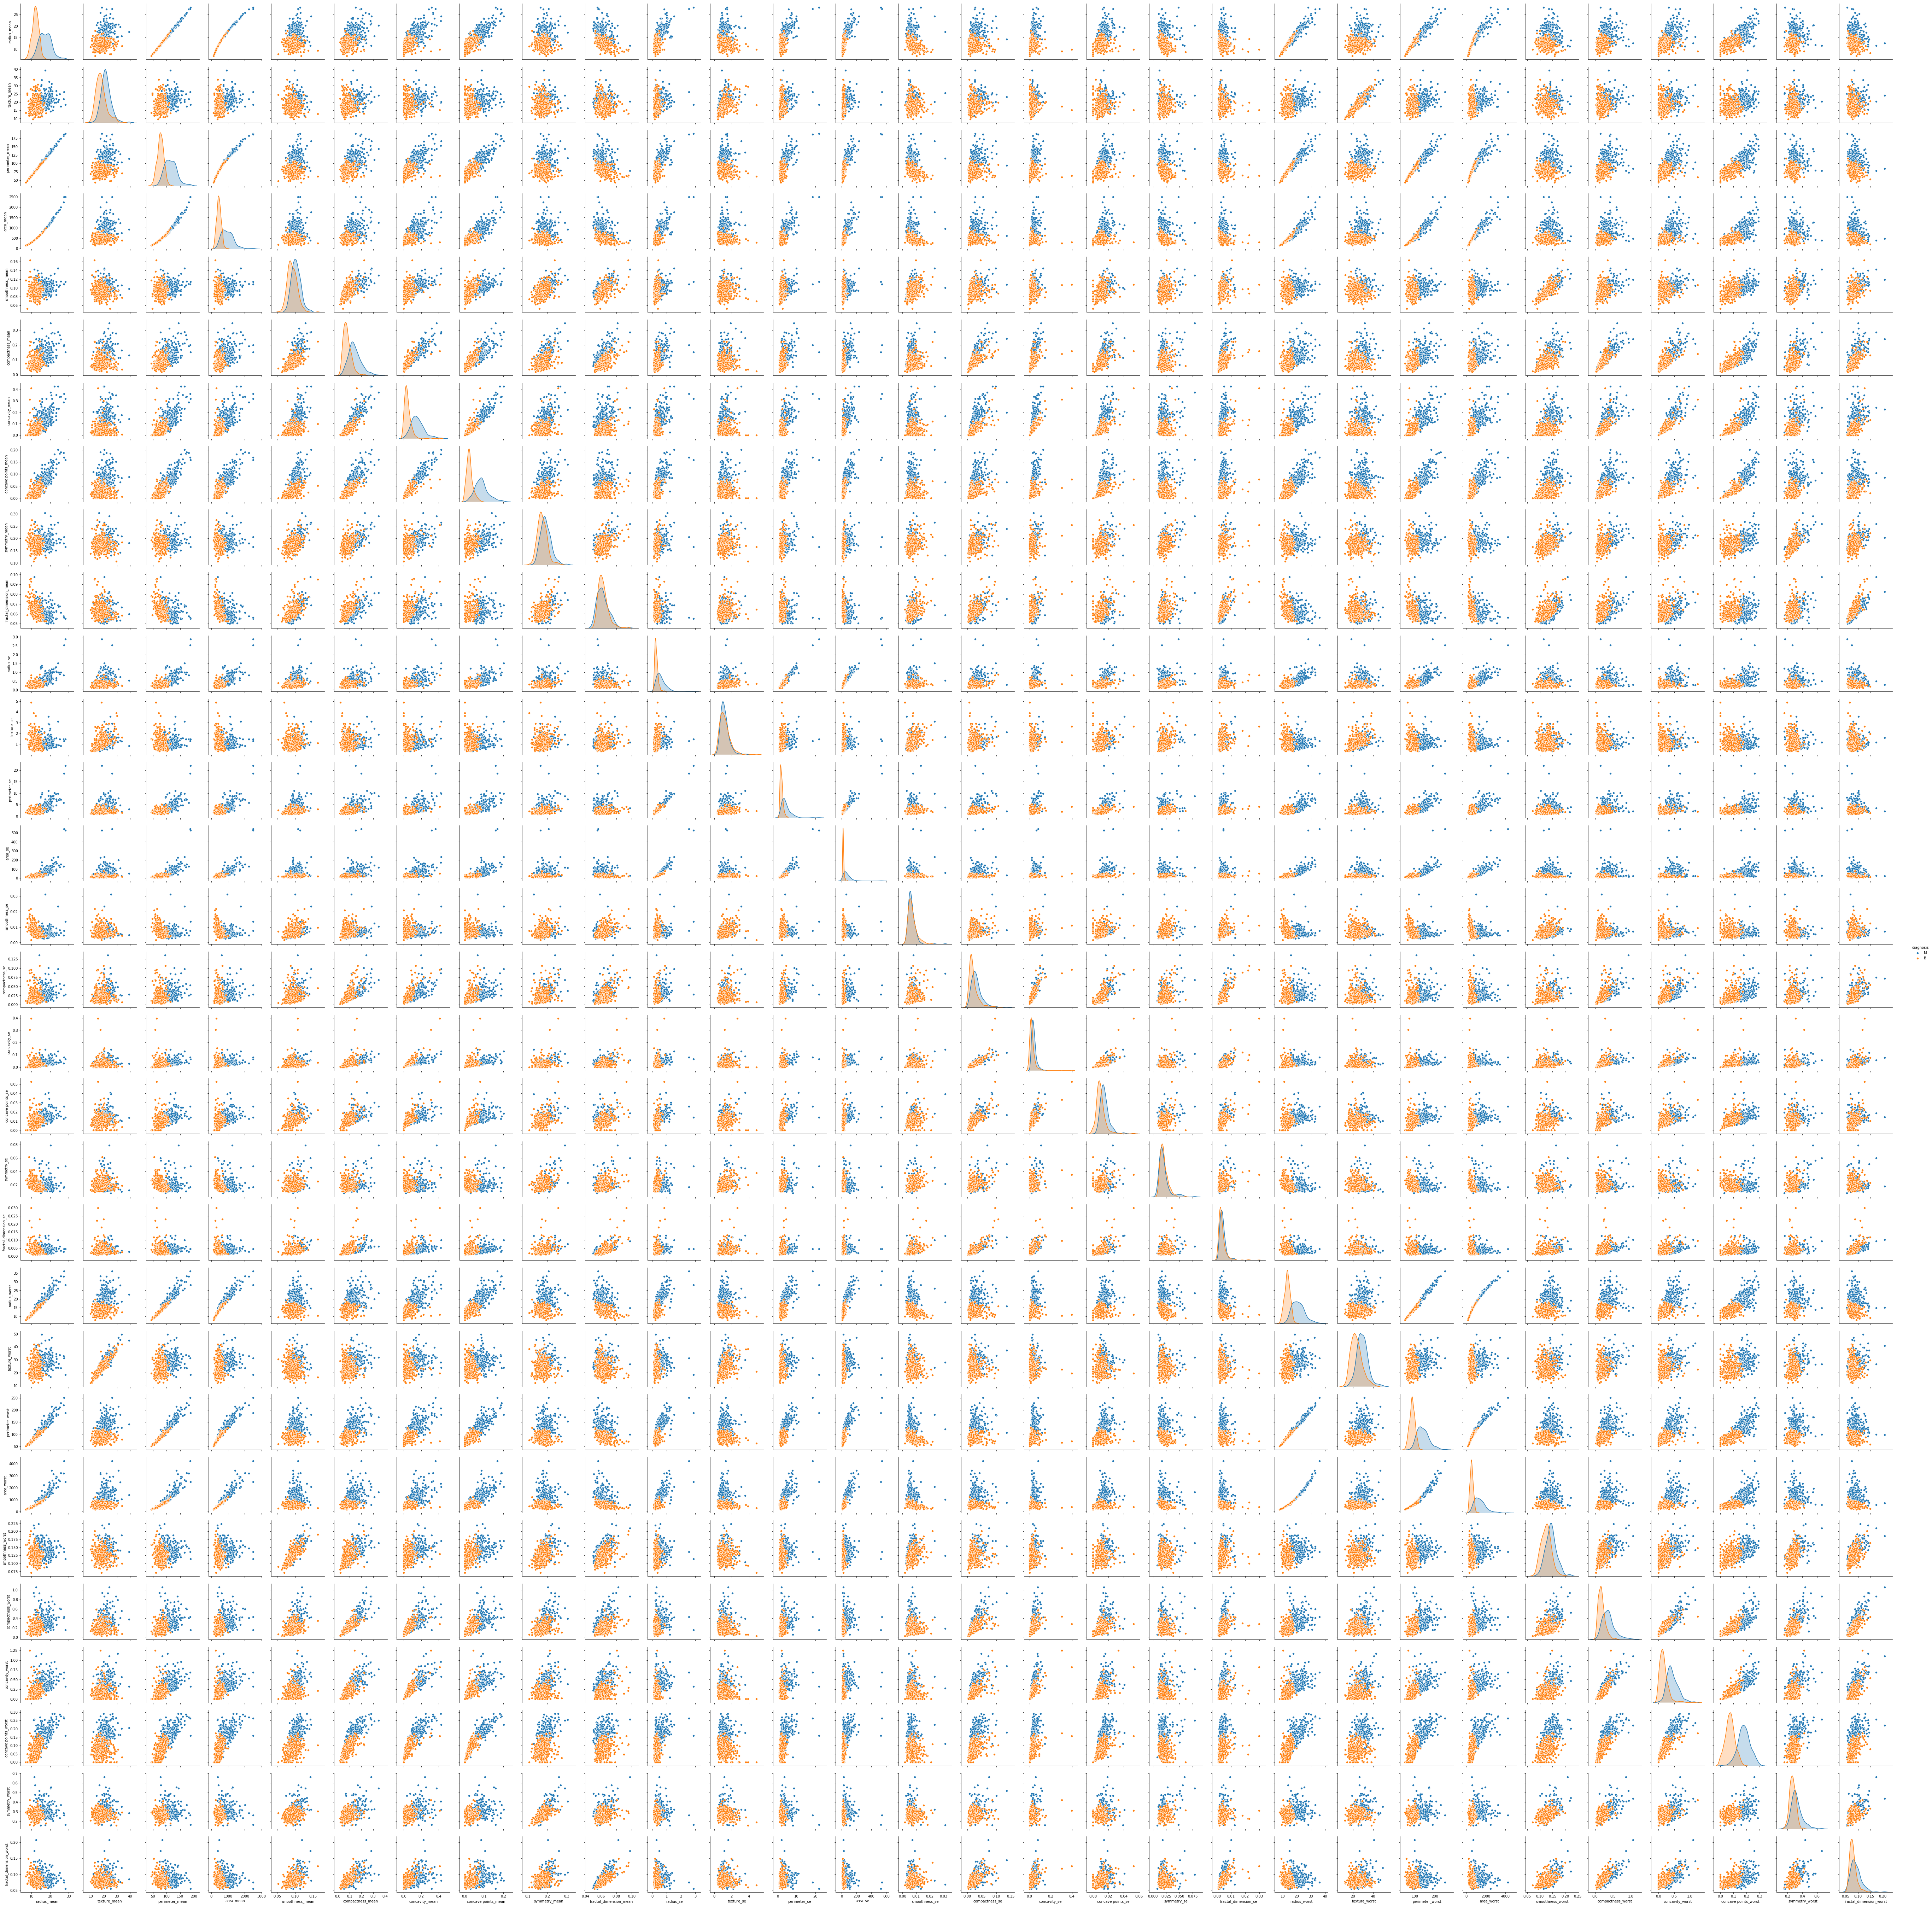

In [19]:
sns.pairplot(dataset.iloc[1:],hue='diagnosis')

#### A common trend observed is that higher mean value of the tumour's dimension is found in malignant tumour

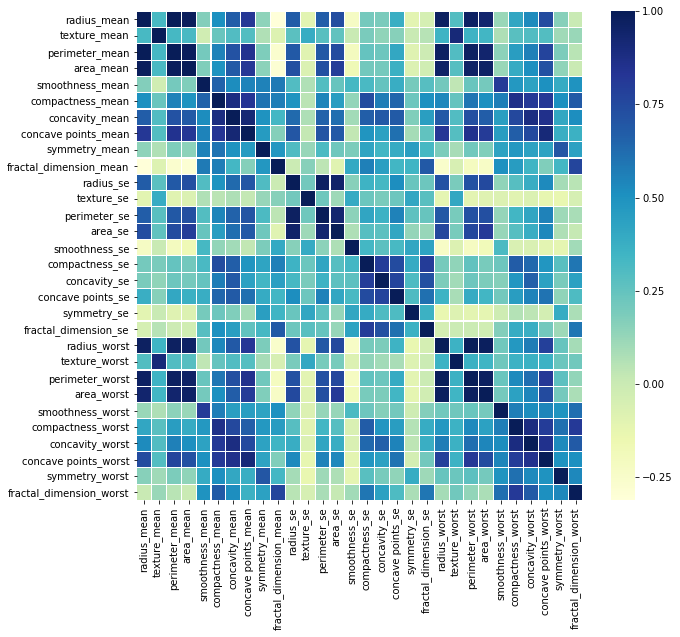

In [20]:
# Correlatioon Heatmap
corrmat = dataset[continuous_features].corr(method='pearson')
f, ax = plt.subplots(figsize =(10, 9))
sns.heatmap(corrmat,cmap='YlGnBu',linewidths=0.1)


### 4. Outliers

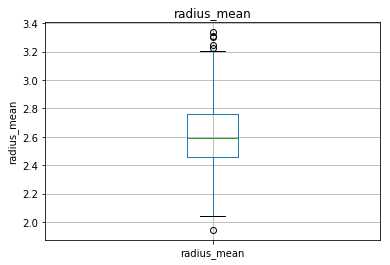

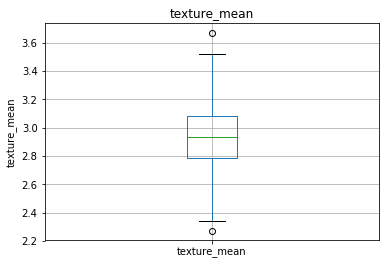

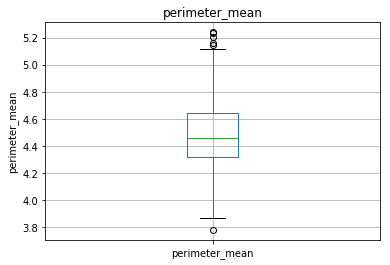

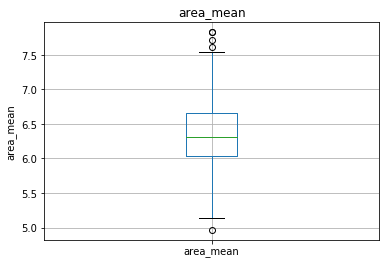

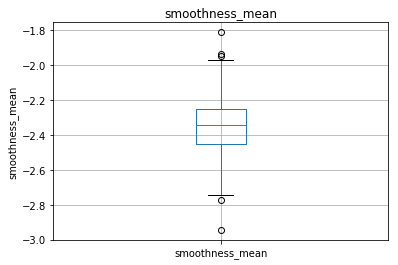

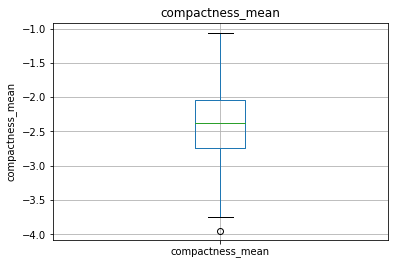

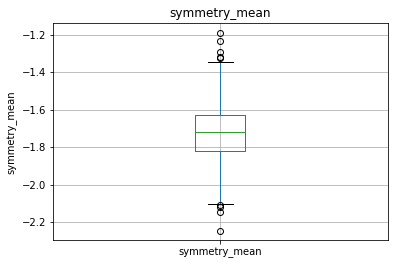

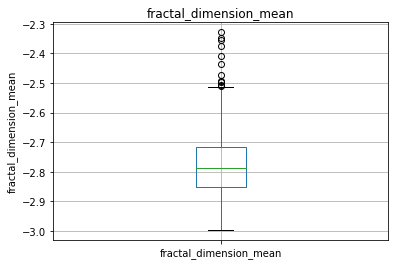

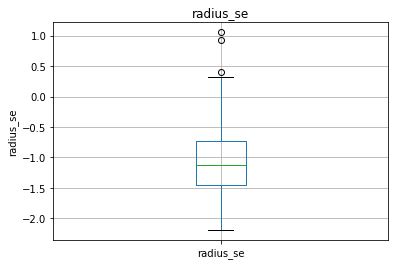

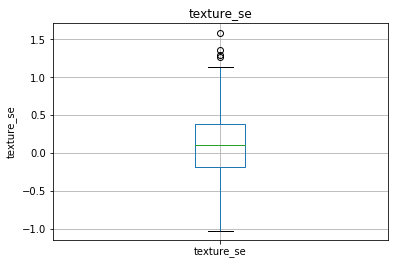

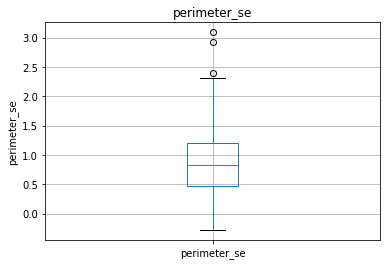

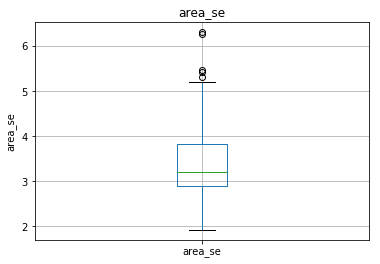

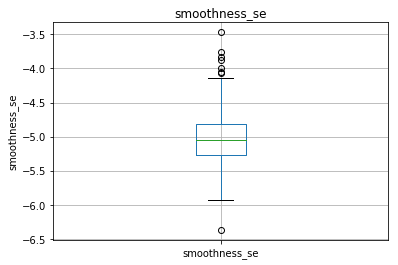

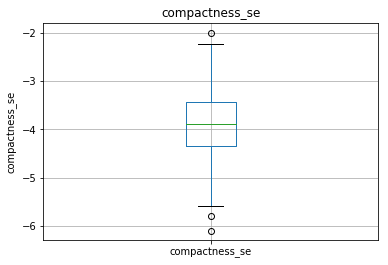

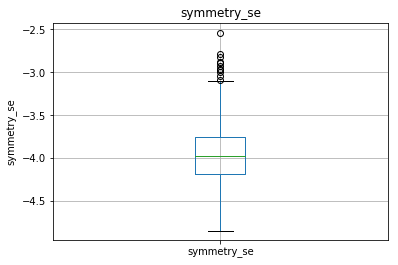

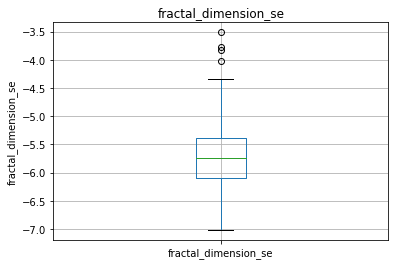

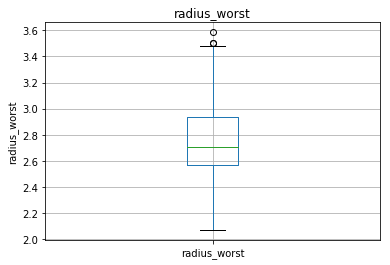

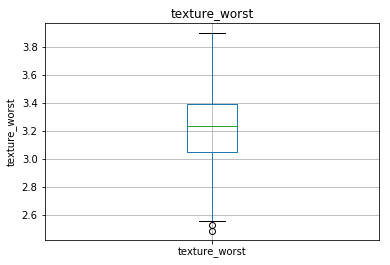

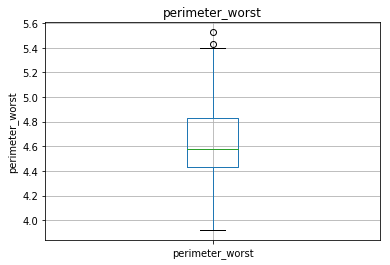

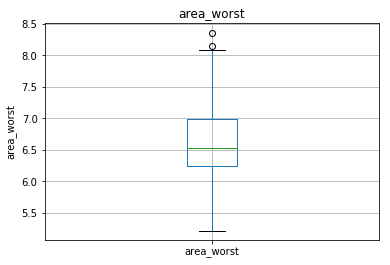

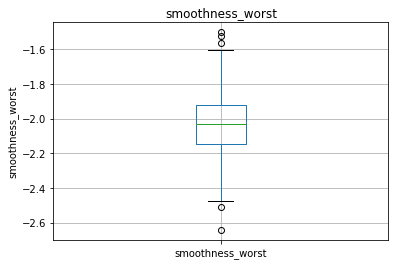

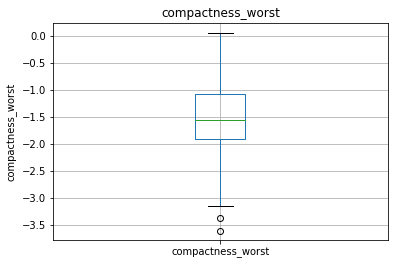

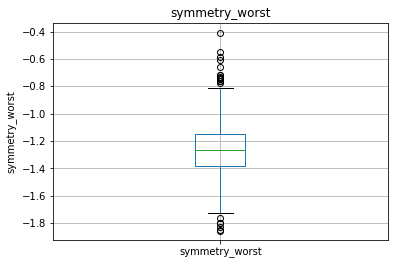

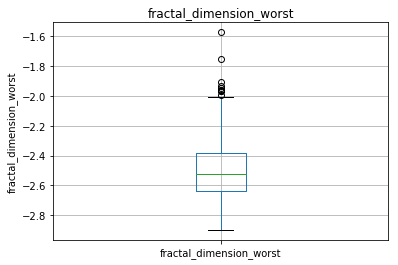

In [21]:
# Outliers in Continuous Features
for feature in continuous_features:    
    data=dataset.copy()
    if 0 in data[feature].unique():  #log cannot take 0
        pass
    else:
        data[feature] = np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

## B. Feature Engineering

### 1.Feature Scaling

In [22]:
dataset.head()

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [23]:
feature_scale = [feature for feature in dataset.columns if feature not in ['diagnosis']]

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(dataset[feature_scale])


MinMaxScaler(copy=True, feature_range=(0, 1))

In [25]:
scaled_data = scaler.transform(dataset[feature_scale])

In [26]:
data = pd.concat([data_original[['id','diagnosis']].reset_index(drop = True),pd.DataFrame(scaled_data,
                  columns = feature_scale)],axis = 1)

In [28]:
data.to_csv("Scaled_data.csv",index=False)

### 2.Feature Selection

In [29]:
dataset = pd.read_csv("Scaled_data.csv")

In [30]:
dataset.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M     0.521037      0.022658        0.545989   0.363733   
1    842517         M     0.643144      0.272574        0.615783   0.501591   
2  84300903         M     0.601496      0.390260        0.595743   0.449417   
3  84348301         M     0.210090      0.360839        0.233501   0.102906   
4  84358402         M     0.629893      0.156578        0.630986   0.489290   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0         0.593753          0.792037        0.703140             0.731113   
1         0.289880          0.181768        0.203608             0.348757   
2         0.514309          0.431017        0.462512             0.635686   
3         0.811321          0.811361        0.565604             0.522863   
4         0.430351          0.347893        0.463918             0.518390   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...      0.620776       0.141525         0.668310    0.450698   
1  ...      0.606901       0.303571         0.539818    0.435214   
2  ...      0.556386       0.360075         0.508442    0.374508   
3  ...      0.248310       0.385928         0.241347    0.094008   
4  ...      0.519744       0.123934         0.506948    0.341575   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0          0.601136           0.619292         0.568610              0.912027   
1          0.347553           0.154563         0.192971              0.639175   
2          0.483590           0.385375         0.359744              0.835052   
3          0.915472           0.814012         0.548642              0.884880   
4          0.437364           0.172415         0.319489              0.558419   

   symmetry_worst  fractal_dimension_worst  
0        0.598462                 0.418864  
1        0.233590                 0.222878  
2        0.403706                 0.213433  
3        1.000000                 0.773711  
4        0.157500                 0.142595  

[5 rows x 32 columns]

In [31]:
y = dataset[['diagnosis']]   #Dependent Feature
X = dataset.drop(['id','diagnosis'],axis=1)   #Independent Feature

In [32]:
y[y=='M'] = 1
y[y=='B'] = 0

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\HP\Anaconda3\lib\site-packages\pandas\core\frame.py:3414: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._where(-key, value, inplace=True)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/sta

In [33]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

In [34]:
feature_sel_model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
feature_sel_model.fit(X,y)


SelectFromModel(estimator=Lasso(alpha=0.005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=0,
   selection='cyclic', tol=0.0001, warm_start=False),
        max_features=None, norm_order=1, prefit=False, threshold=None)

In [35]:
feature_sel_model.get_support()

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True,  True, False, False,  True, False, False,
        True, False, False])

In [36]:
selected_features = X.columns[feature_sel_model.get_support()]

In [37]:
print('Selected Features: ',len(selected_features))
selected_features

Selected Features:  5


Index(['concave points_mean', 'radius_worst', 'texture_worst',
       'smoothness_worst', 'concave points_worst'],
      dtype='object')

In [38]:
X = X[selected_features]

In [39]:
X.head()

concave points_mean  radius_worst  texture_worst  smoothness_worst  \
0             0.731113      0.620776       0.141525          0.601136   
1             0.348757      0.606901       0.303571          0.347553   
2             0.635686      0.556386       0.360075          0.483590   
3             0.522863      0.248310       0.385928          0.915472   
4             0.518390      0.519744       0.123934          0.437364   

   concave points_worst  
0              0.912027  
1              0.639175  
2              0.835052  
3              0.884880  
4              0.558419

# C. Model Fitting And Testing

In [40]:
#imports for model fitting and testing
import sys
import scipy
import sklearn
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from sklearn import preprocessing

In [111]:
# Splitting dataset into Training Set and Testing Set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 0)

In [112]:
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

## 1. ANN(Artificial Neural Network)

In [44]:
import keras
from keras.models import Sequential
from keras.layers import Input,Dense, Dropout, Activation, BatchNormalization
from keras.optimizers import SGD

Using TensorFlow backend.


In [160]:
model = Sequential()

#Input Layer
model.add(Dense(64, input_dim = 5)) 
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.2))

#First Hidden Layer
model.add(Dense(32))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.2))

#Second Hidden layer
model.add(Dense(32))
model.add(Activation('softmax'))

#Output Layer
model.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))


#Compile
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`


In [161]:
model.fit(X_train,y_train,epochs=20, batch_size=32, validation_data=(X_test,y_test))

Train on 455 samples, validate on 114 samples
Epoch 1/20
455/455 [==============================] - 1s 2ms/step - loss: 0.6902 - accuracy: 0.6593 - val_loss: 0.6912 - val_accuracy: 0.5877
Epoch 2/20
455/455 [==============================] - 0s 129us/step - loss: 0.6821 - accuracy: 0.7692 - val_loss: 0.6894 - val_accuracy: 0.5877
Epoch 3/20
455/455 [==============================] - 0s 132us/step - loss: 0.6738 - accuracy: 0.8000 - val_loss: 0.6870 - val_accuracy: 0.5877
Epoch 4/20
455/455 [==============================] - 0s 116us/step - loss: 0.6626 - accuracy: 0.8593 - val_loss: 0.6838 - val_accuracy: 0.5877
Epoch 5/20
455/455 [==============================] - 0s 116us/step - loss: 0.6502 - accuracy: 0.9077 - val_loss: 0.6789 - val_accuracy: 0.5877
Epoch 6/20
455/455 [==============================] - 0s 107us/step - loss: 0.6381 - accuracy: 0.9231 - val_loss: 0.6722 - val_accuracy: 0.5877
Epoch 7/20
455/455 [==============================] - 0s 112us/step - loss: 0.6265 - accurac

accuracy:  97.3684 %


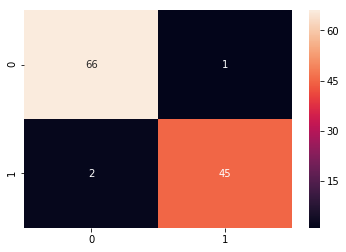

In [164]:
# Predicting the test set results

y_pred = model.predict(X_test)
y_pred = (y_pred >= 0.5)*1

#Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test.astype(int),y_pred.astype(int))

sns.heatmap(conf_mat, annot = True)
print('accuracy: ',(accuracy_score(y_test.astype(int),y_pred.astype(int))*100).round(4),'%')



## 2. KNN(K nearest neighbour)

In [148]:
def acc_check(name, model):
    kfold = model_selection.KFold(n_splits= 10, random_state= 0)
    cv_results = model_selection.cross_val_score(model,X_train,y_train.astype(int),cv= kfold,scoring = 'accuracy')
    print(name, ': cv_results:',cv_results.mean().round(4),' std: (' ,cv_results.std().round(4),')')
    
#KNN
acc_check("KNN",KNeighborsClassifier(n_neighbors=5))
acc_check("SVM",SVC())

KNN : cv_results: 0.9603  std: ( 0.0217 )
SVM : cv_results: 0.9628  std: ( 0.0219 )


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:528: DataConversionWarning: A column-vector y was passed 

In [155]:
#Predictions on validation set

def pred_val(name,model):
    model.fit(X_train,y_train.astype(int))
    predictions = model.predict(X_test)
    print(name,'- accuracy_score: ',accuracy_score(y_test.astype(int),predictions).round(4)*100,'%')
    print(classification_report(y_test.astype(int),predictions))
    
    

In [188]:
#KNN prediction
pred_val("KNN",KNeighborsClassifier(n_neighbors=5))

KNN - accuracy_score:  97.37 %
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

   micro avg       0.97      0.97      0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


##  3. SVM(Support Vector Machine)

In [198]:
pred_val("SVM",SVC())

SVM - accuracy_score:  94.74000000000001 %
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        67
           1       1.00      0.87      0.93        47

   micro avg       0.95      0.95      0.95       114
   macro avg       0.96      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


## 4. Random Forest Classifier

In [197]:
#Random Forest Classifier prediction
from sklearn.ensemble import RandomForestClassifier

pred_val("RFC",RandomForestClassifier(random_state=0))

RFC - accuracy_score:  96.49 %
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

   micro avg       0.96      0.96      0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



C:\Users\HP\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


## Conclusion

1. In order to predict the class of the tumour we need only 5   features viz. concave points_mean, radius_worst, texture_worst, smoothness_worst, concave points_worst.

2. Most of the outliers fall in the class of Malignant tumour

3. Accuracy scores of the models are as follows: